In [2]:
import numpy as np
 
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.astype('float')/255.0
x_test = x_test.astype('float')/255.0
x_train = np.reshape(x_train, (60000,784))
x_test = np.reshape(x_test, (10000,784))

11493376/11490434 [==============================] - 4s 0us/step


In [4]:
x_train_noisy = x_train+np.random.rand(60000,784)*0.9
x_test_noisy = x_test+np.random.rand(10000,784)*0.9
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

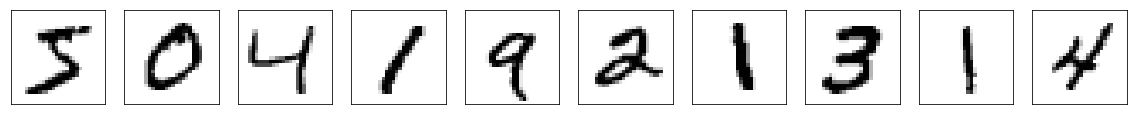

In [8]:
def plot(x,p,labels = False):
    plt.figure(figsize = (20,2))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(x[i].reshape(28,28),cmap = 'binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
    
plot(x_train,None)

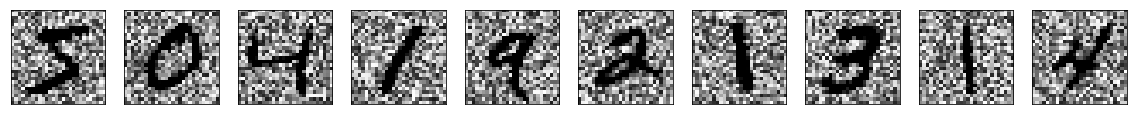

In [6]:
plot(x_train_noisy,None)

In [14]:
classifier = Sequential([
    Dense(256, activation = 'relu', input_shape = (784,)),
    Dense(256, activation = 'relu'),
    Dense(10,activation = 'softmax')
])

classifier.compile(
 optimizer = 'adam',
 loss = 'sparse_categorical_crossentropy',
 metrics = ['accuracy'])

classifier.fit(x_train, y_train, epochs = 3, batch_size = 512)

Epoch 1/3
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4230 - acc: 0.8846
Epoch 2/3
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1581 - acc: 0.9538
Epoch 3/3
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1066 - acc: 0.96891s - l - ETA: 0s - loss: 0.1066 - acc: 0.


In [16]:
loss,acc = classifier.evaluate(x_test,y_test)
print(acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.1042 - acc: 0.9691
0.9691


In [18]:
loss,acc = classifier.evaluate(x_test_noisy,y_test)
print(acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 9.1700 - acc: 0.1344
0.1344


In [ ]:
Buiding Autoencoder

In [21]:
input_image = Input(shape = (784,))
encoded = Dense(64, activation = 'relu')(input_image)
decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [25]:
autoencoder.fit(
x_train_noisy, x_train, epochs = 100,
batch_size = 512, validation_split = 0.2, verbose = False,
callbacks = [
    EarlyStopping(monitor = 'val_loss', patience = 5),
    LambdaCallback(on_epoch_end = lambda e,l: print('{:.3f}'.format(l["val_loss"]), end = ' _ '))
])

print(' _ ')
print('Training is complete!')

0.142 _ 0.138 _ 0.134 _ 0.131 _ 0.128 _ 0.126 _ 0.124 _ 0.121 _ 0.120 _ 0.118 _ 0.117 _ 0.115 _ 0.114 _ 0.113 _ 0.112 _ 0.112 _ 0.111 _ 0.110 _ 0.110 _ 0.109 _ 0.109 _ 0.109 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _  _ 
Training is complete!


In [26]:
predictions = autoencoder.predict(x_test_noisy) 

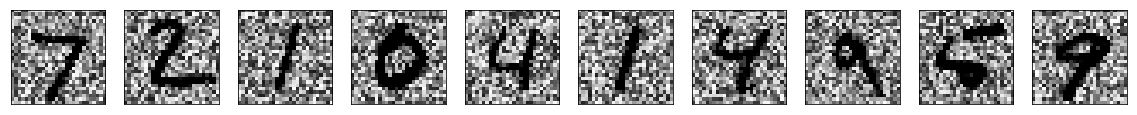

In [27]:
plot(x_test_noisy, None)

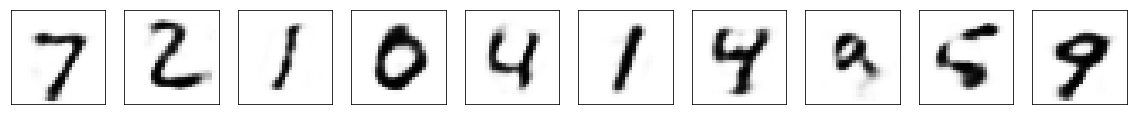

In [28]:
plot(predictions, None)

In [30]:
loss,acc = classifier.evaluate(predictions, y_test)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.1729 - acc: 0.9459


In [ ]:
Combining the models

In [31]:
input_image = Input(shape = (784,))
x = autoencoder(input_image)
y = classifier(x)

denoise_and_classify = Model(input_image, y)

In [33]:
predictions = denoise_and_classify.predict(x_test_noisy)

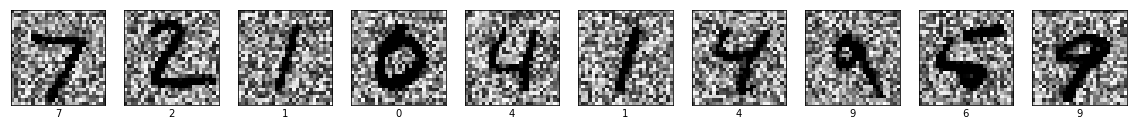

In [34]:
plot(x_test_noisy, predictions, True)

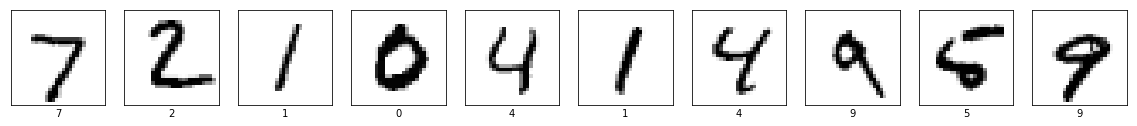

In [35]:
plot(x_test, to_categorical(y_test), True)